In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB_VFDB_combined.csv")

In [ ]:
df.shape

(12775, 12)

In [ ]:

# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
1    2399
0    2399
Name: count, dtype: int64


In [ ]:
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((960, 11), (3838, 11), (960,), (3838,))

# **7 Models**

In [ ]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True, gamma=0.001, C=100),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

from sklearn.metrics import roc_auc_score

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Predict probability of positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    results[name] = (accuracy, auc_roc, report)

E:\Softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print accuracy, AUC-ROC, and classifier report for each model
for name, (accuracy, auc_roc, report) in results.items():
    print(f"{name}:")
    print(f"Accuracy = {accuracy*100}%")
    print(f"AUC-ROC = {auc_roc}")
    print("Classifier Report:")
    print(report)
    print("=" * 50)


Logistic Regression:
Accuracy = 84.375%
AUC-ROC = 0.9195309007417567
Classifier Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       481
           1       0.83      0.87      0.85       479

    accuracy                           0.84       960
   macro avg       0.84      0.84      0.84       960
weighted avg       0.84      0.84      0.84       960

Decision Tree:
Accuracy = 89.16666666666667%
AUC-ROC = 0.8916488352814032
Classifier Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       481
           1       0.90      0.88      0.89       479

    accuracy                           0.89       960
   macro avg       0.89      0.89      0.89       960
weighted avg       0.89      0.89      0.89       960

Random Forest:
Accuracy = 93.64583333333333%
AUC-ROC = 0.9814257006323812
Classifier Report:
              precision    recall  f1-score   support

           0     

# **Execution Time**

In [ ]:
import time
start_time = time.time()



end_time = time.time()
execution_time = end_time - start_time
print("Execution time: %s seconds" % execution_time)

Execution time: 0.0 seconds


In [ ]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Train and evaluate each classifier, measure execution time
results = {}
for name, clf in classifiers.items():
    start_time = time.time()  # Start timer
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    results[name] = (accuracy, auc_roc, report)
    end_time = time.time()  # End timer

    execution_time = end_time - start_time
    print(f"{name} execution time: {execution_time:.4f} seconds")  # Print time


E:\Softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression execution time: 0.0481 seconds
Decision Tree execution time: 0.0900 seconds
Random Forest execution time: 1.7832 seconds
SVM execution time: 4.8923 seconds
Naive Bayes execution time: 0.0175 seconds
KNN execution time: 0.0662 seconds
XGBoost execution time: 0.1060 seconds


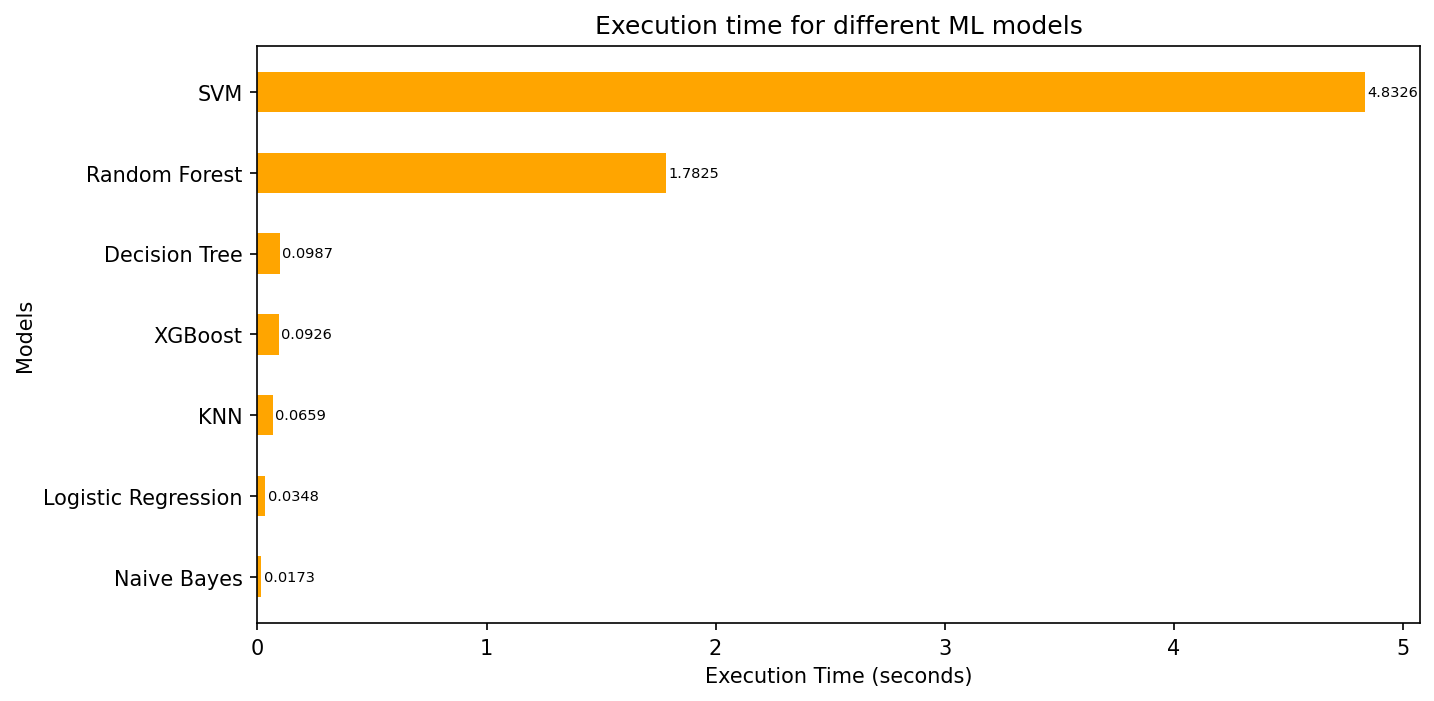

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding execution times
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Naive Bayes", "KNN", "XGBoost"]
execution_times = [0.0348, 0.0987, 1.7825, 4.8326, 0.0173, 0.0659, 0.0926]

# Sort the model names and execution times based on execution times
sorted_indices = sorted(range(len(execution_times)), key=lambda k: execution_times[k])
sorted_models = [models[i] for i in sorted_indices]
sorted_execution_times = [execution_times[i] for i in sorted_indices]

# Plotting the bars
plt.figure(figsize=(10, 5), dpi=150)
bars = plt.barh(sorted_models, sorted_execution_times, color='orange', height=0.5, linewidth=0.1)  # Adjust height here
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Models')
plt.title('Execution time for different ML models')

# Displaying execution times beside the bars
for i, bar in enumerate(bars):
     plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{sorted_execution_times[i]:.4f}",
              va='center', fontsize=7)

plt.show()


# **Feature selection**

In [ ]:
# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

# Train each model and retrieve feature importances
feature_importance = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    feature_importance[name] = clf.feature_importances_


In [ ]:
print(feature_importance)

{'Decision Tree': array([0.12293092, 0.06944253, 0.02164835, 0.03978114, 0.03579818,
       0.07185394, 0.03632191, 0.01540351, 0.04263939, 0.51814822,
       0.02603191]), 'Random Forest': array([0.13600734, 0.05527331, 0.14689452, 0.09990902, 0.03492244,
       0.06150119, 0.0579645 , 0.04361166, 0.08618549, 0.23618509,
       0.04154545])}


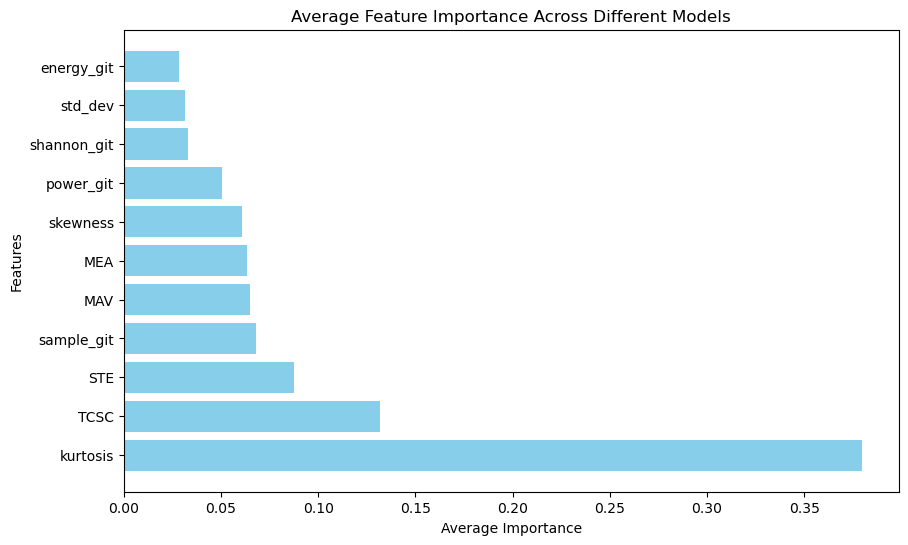

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train each model and retrieve feature importances
feature_importance = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    feature_importance[name] = clf.feature_importances_

# Calculate average feature importance for each feature
average_importance = {}
for model_importance in feature_importance.values():
    for feature, importance in enumerate(model_importance):
        if feature not in average_importance:
            average_importance[feature] = []
        average_importance[feature].append(importance)

# Get column names of features
feature_names = X.columns

for feature, importances in average_importance.items():
    average_importance[feature] = np.mean(importances)

# Plot average feature importance
sorted_features = sorted(average_importance, key=average_importance.get, reverse=True)
sorted_feature_names = [feature_names[idx] for idx in sorted_features]
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, [average_importance[feature] for feature in sorted_features], color='skyblue')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.title('Average Feature Importance Across Different Models')
plt.show()


# **Accuracy, sensitivity, specificity, precision, Negative Predictive Value (NPV), and AUC-ROC**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True, gamma=0.001, C=100),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    npv = tn / (tn + fn)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Predict probability of positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    results[name] = (accuracy, sensitivity, specificity, precision, npv, auc_roc, report)

# Print accuracy, sensitivity, specificity, precision, NPV, AUC-ROC, and classifier report for each model
for name, (accuracy, sensitivity, specificity, precision, npv, auc_roc, report) in results.items():
    print(f"{name}:")
    print(f"Accuracy = {accuracy*100:.2f}")
    print(f"Sensitivity = {sensitivity*100:.2f}")
    print(f"Specificity = {specificity*100:.2f}")
    print(f"Precision = {precision*100:.2f}")
    print(f"Negative Predictive Value (NPV) = {npv*100:.2f}")
    print(f"AUC-ROC = {auc_roc*100:.2f}")
    #print("Classifier Report:")
    #print(report)
    print("=" * 50)


E:\Softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy = 84.79
Sensitivity = 87.95
Specificity = 81.72
Precision = 82.38
Negative Predictive Value (NPV) = 87.47
AUC-ROC = 92.08
Decision Tree:
Accuracy = 89.27
Sensitivity = 89.22
Specificity = 89.32
Precision = 89.03
Negative Predictive Value (NPV) = 89.51
AUC-ROC = 89.27
Random Forest:
Accuracy = 93.12
Sensitivity = 93.66
Specificity = 92.61
Precision = 92.48
Negative Predictive Value (NPV) = 93.76
AUC-ROC = 98.29
SVM:
Accuracy = 88.85
Sensitivity = 90.70
Specificity = 87.06
Precision = 87.20
Negative Predictive Value (NPV) = 90.60
AUC-ROC = 93.29
Naive Bayes:
Accuracy = 69.90
Sensitivity = 46.30
Specificity = 92.81
Precision = 86.22
Negative Predictive Value (NPV) = 64.02
AUC-ROC = 88.84
KNN:
Accuracy = 88.23
Sensitivity = 91.33
Specificity = 85.22
Precision = 85.71
Negative Predictive Value (NPV) = 91.01
AUC-ROC = 93.59
XGBoost:
Accuracy = 93.65
Sensitivity = 95.14
Specificity = 92.20
Precision = 92.21
Negative Predictive Value (NPV) = 95.13
AUC-ROC = 98.21


## **Plots**

### **Accuracy, sensitivity, specificity**

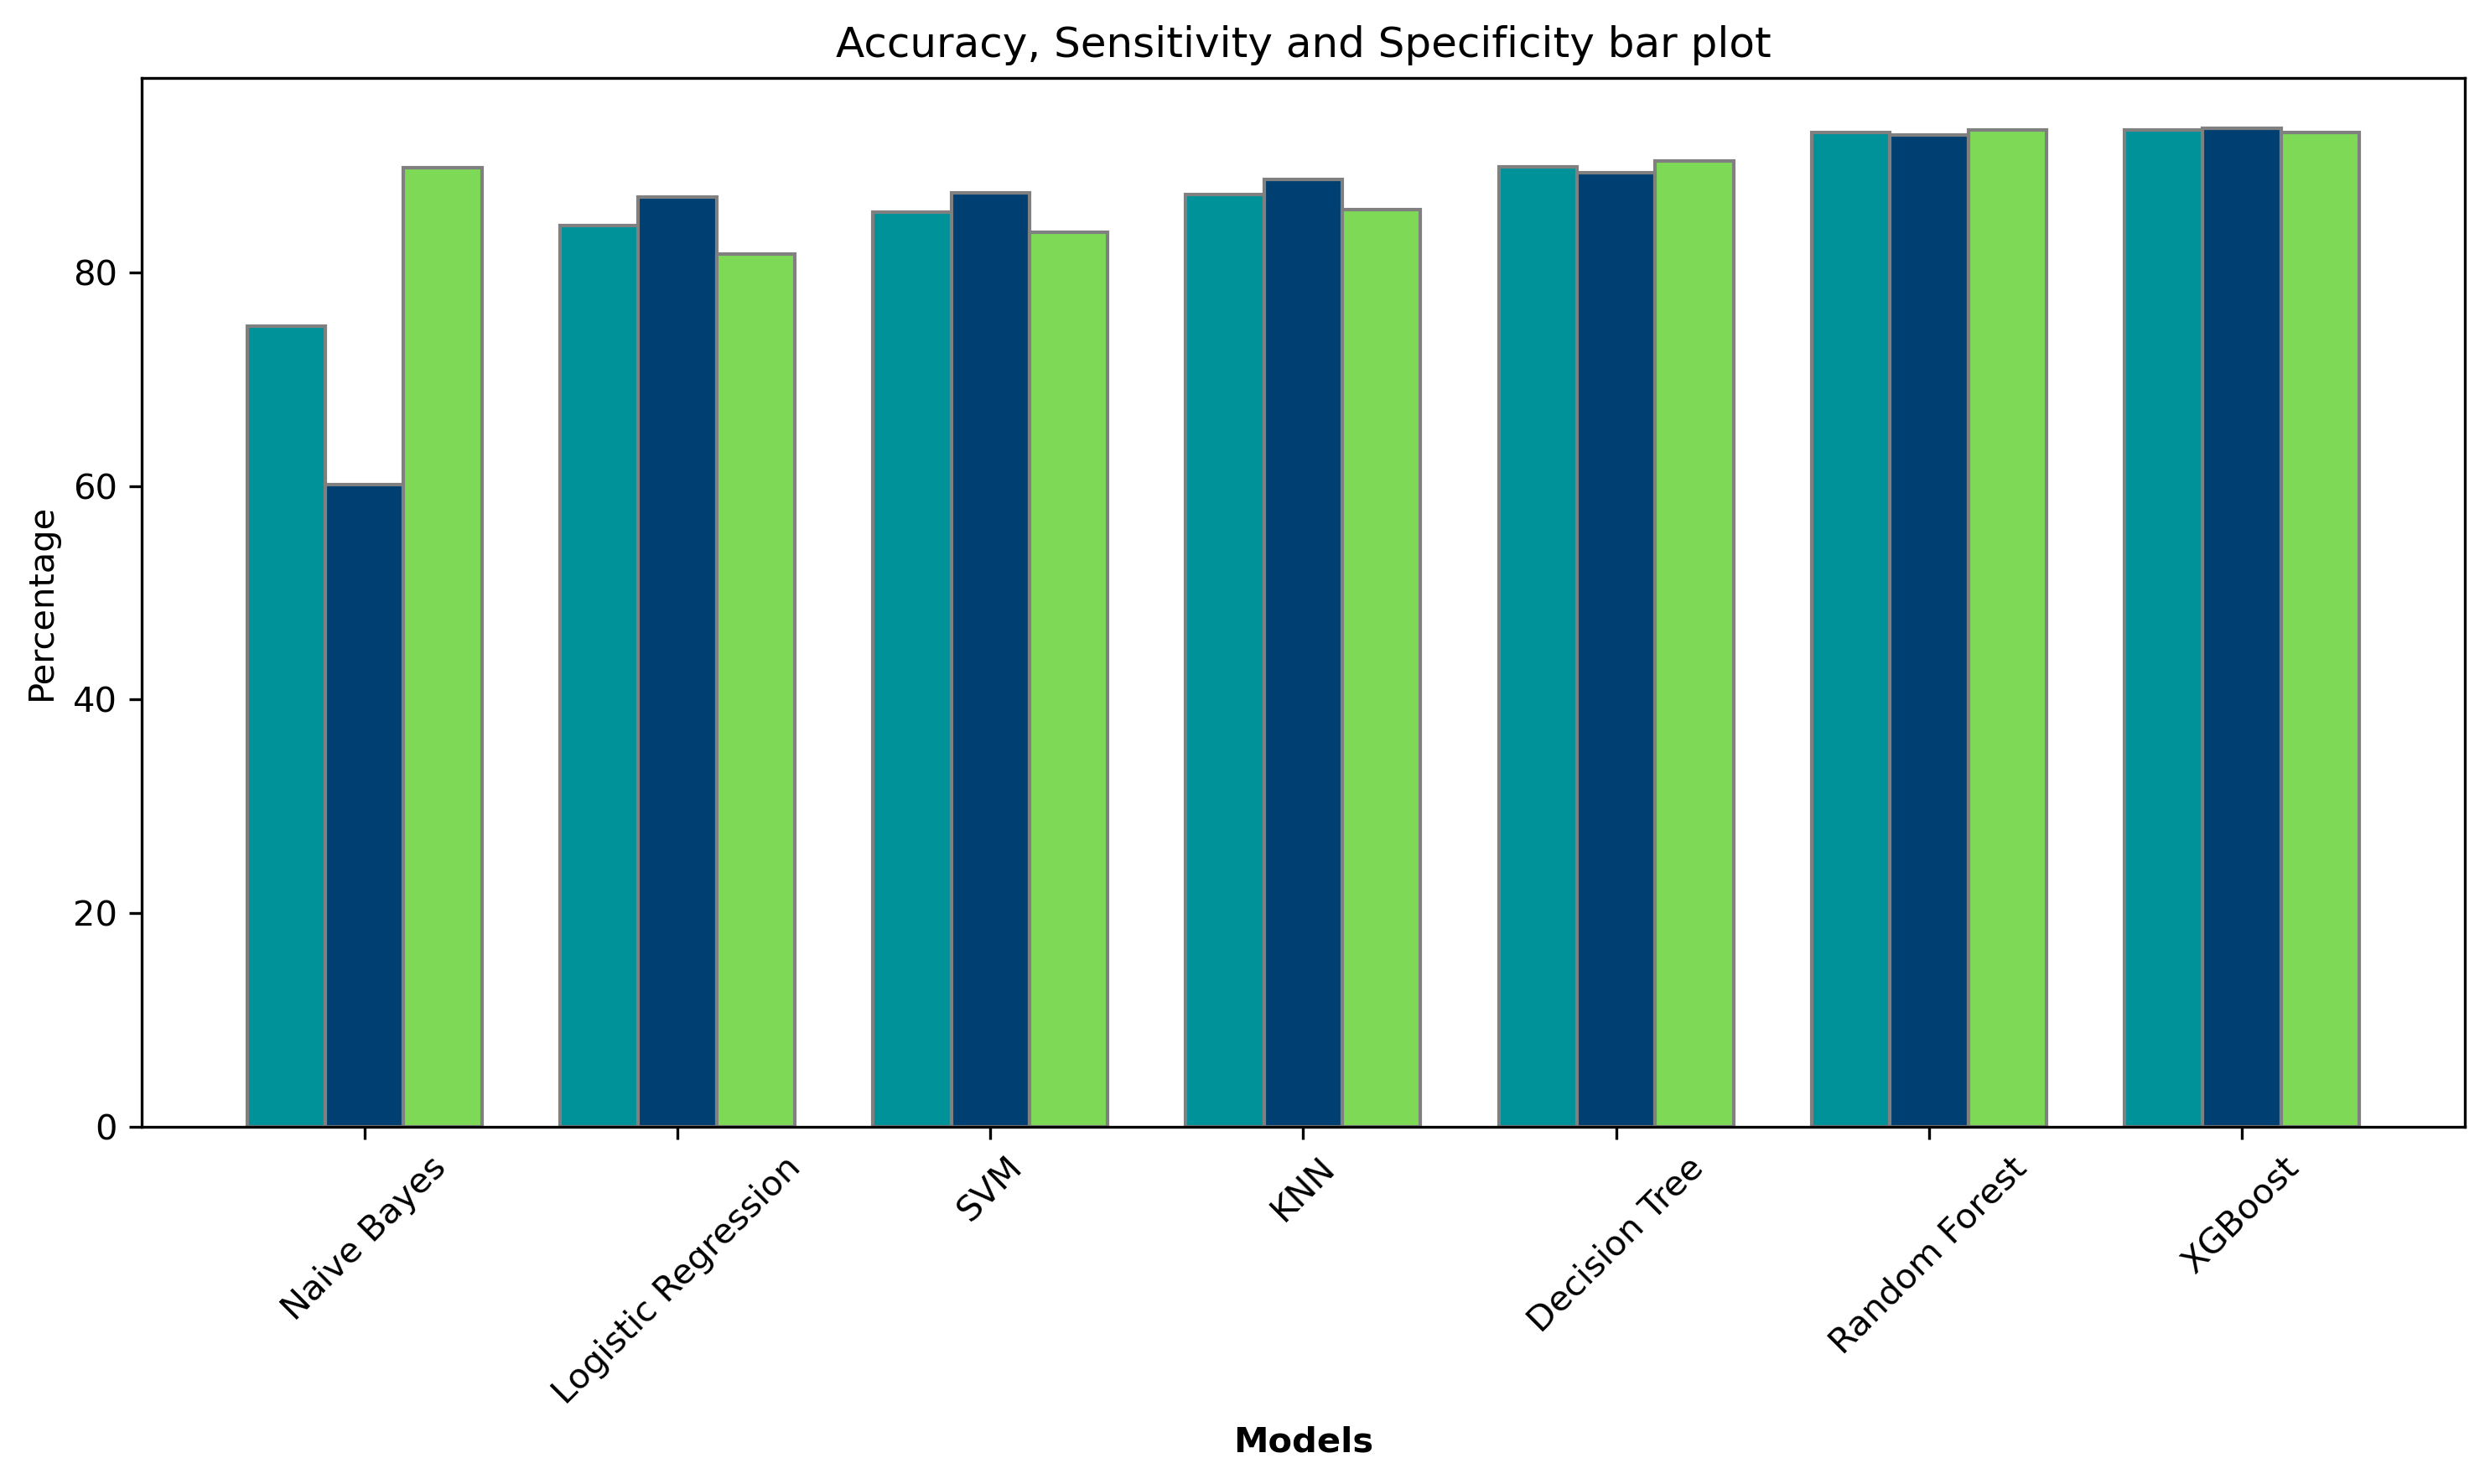

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Naive Bayes", "KNN", "XGBoost"]

# Performance metrics
accuracy_values = [84.38, 89.90, 93.12, 85.62, 75.00, 87.29, 93.33]
sensitivity_values = [87.06, 89.35, 92.90, 87.47, 60.13, 88.73, 93.53]
specificity_values = [81.70, 90.44, 93.35, 83.78, 89.81, 85.86, 93.14]

# Sort models based on accuracy
sorted_indices = sorted(range(len(accuracy_values)), key=lambda k: accuracy_values[k])
models_sorted = [models[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]
sensitivity_values_sorted = [sensitivity_values[i] for i in sorted_indices]
specificity_values_sorted = [specificity_values[i] for i in sorted_indices]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(r1, accuracy_values_sorted, color='#009299', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, sensitivity_values_sorted, color='#003f72', width=bar_width, edgecolor='grey', label='Sensitivity')
plt.bar(r3, specificity_values_sorted, color='#7ed957', width=bar_width, edgecolor='grey', label='Specificity')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models_sorted, rotation=45)
plt.ylabel('Percentage')
plt.title('Accuracy, Sensitivity and Specificity bar plot')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.tight_layout()
plt.show()


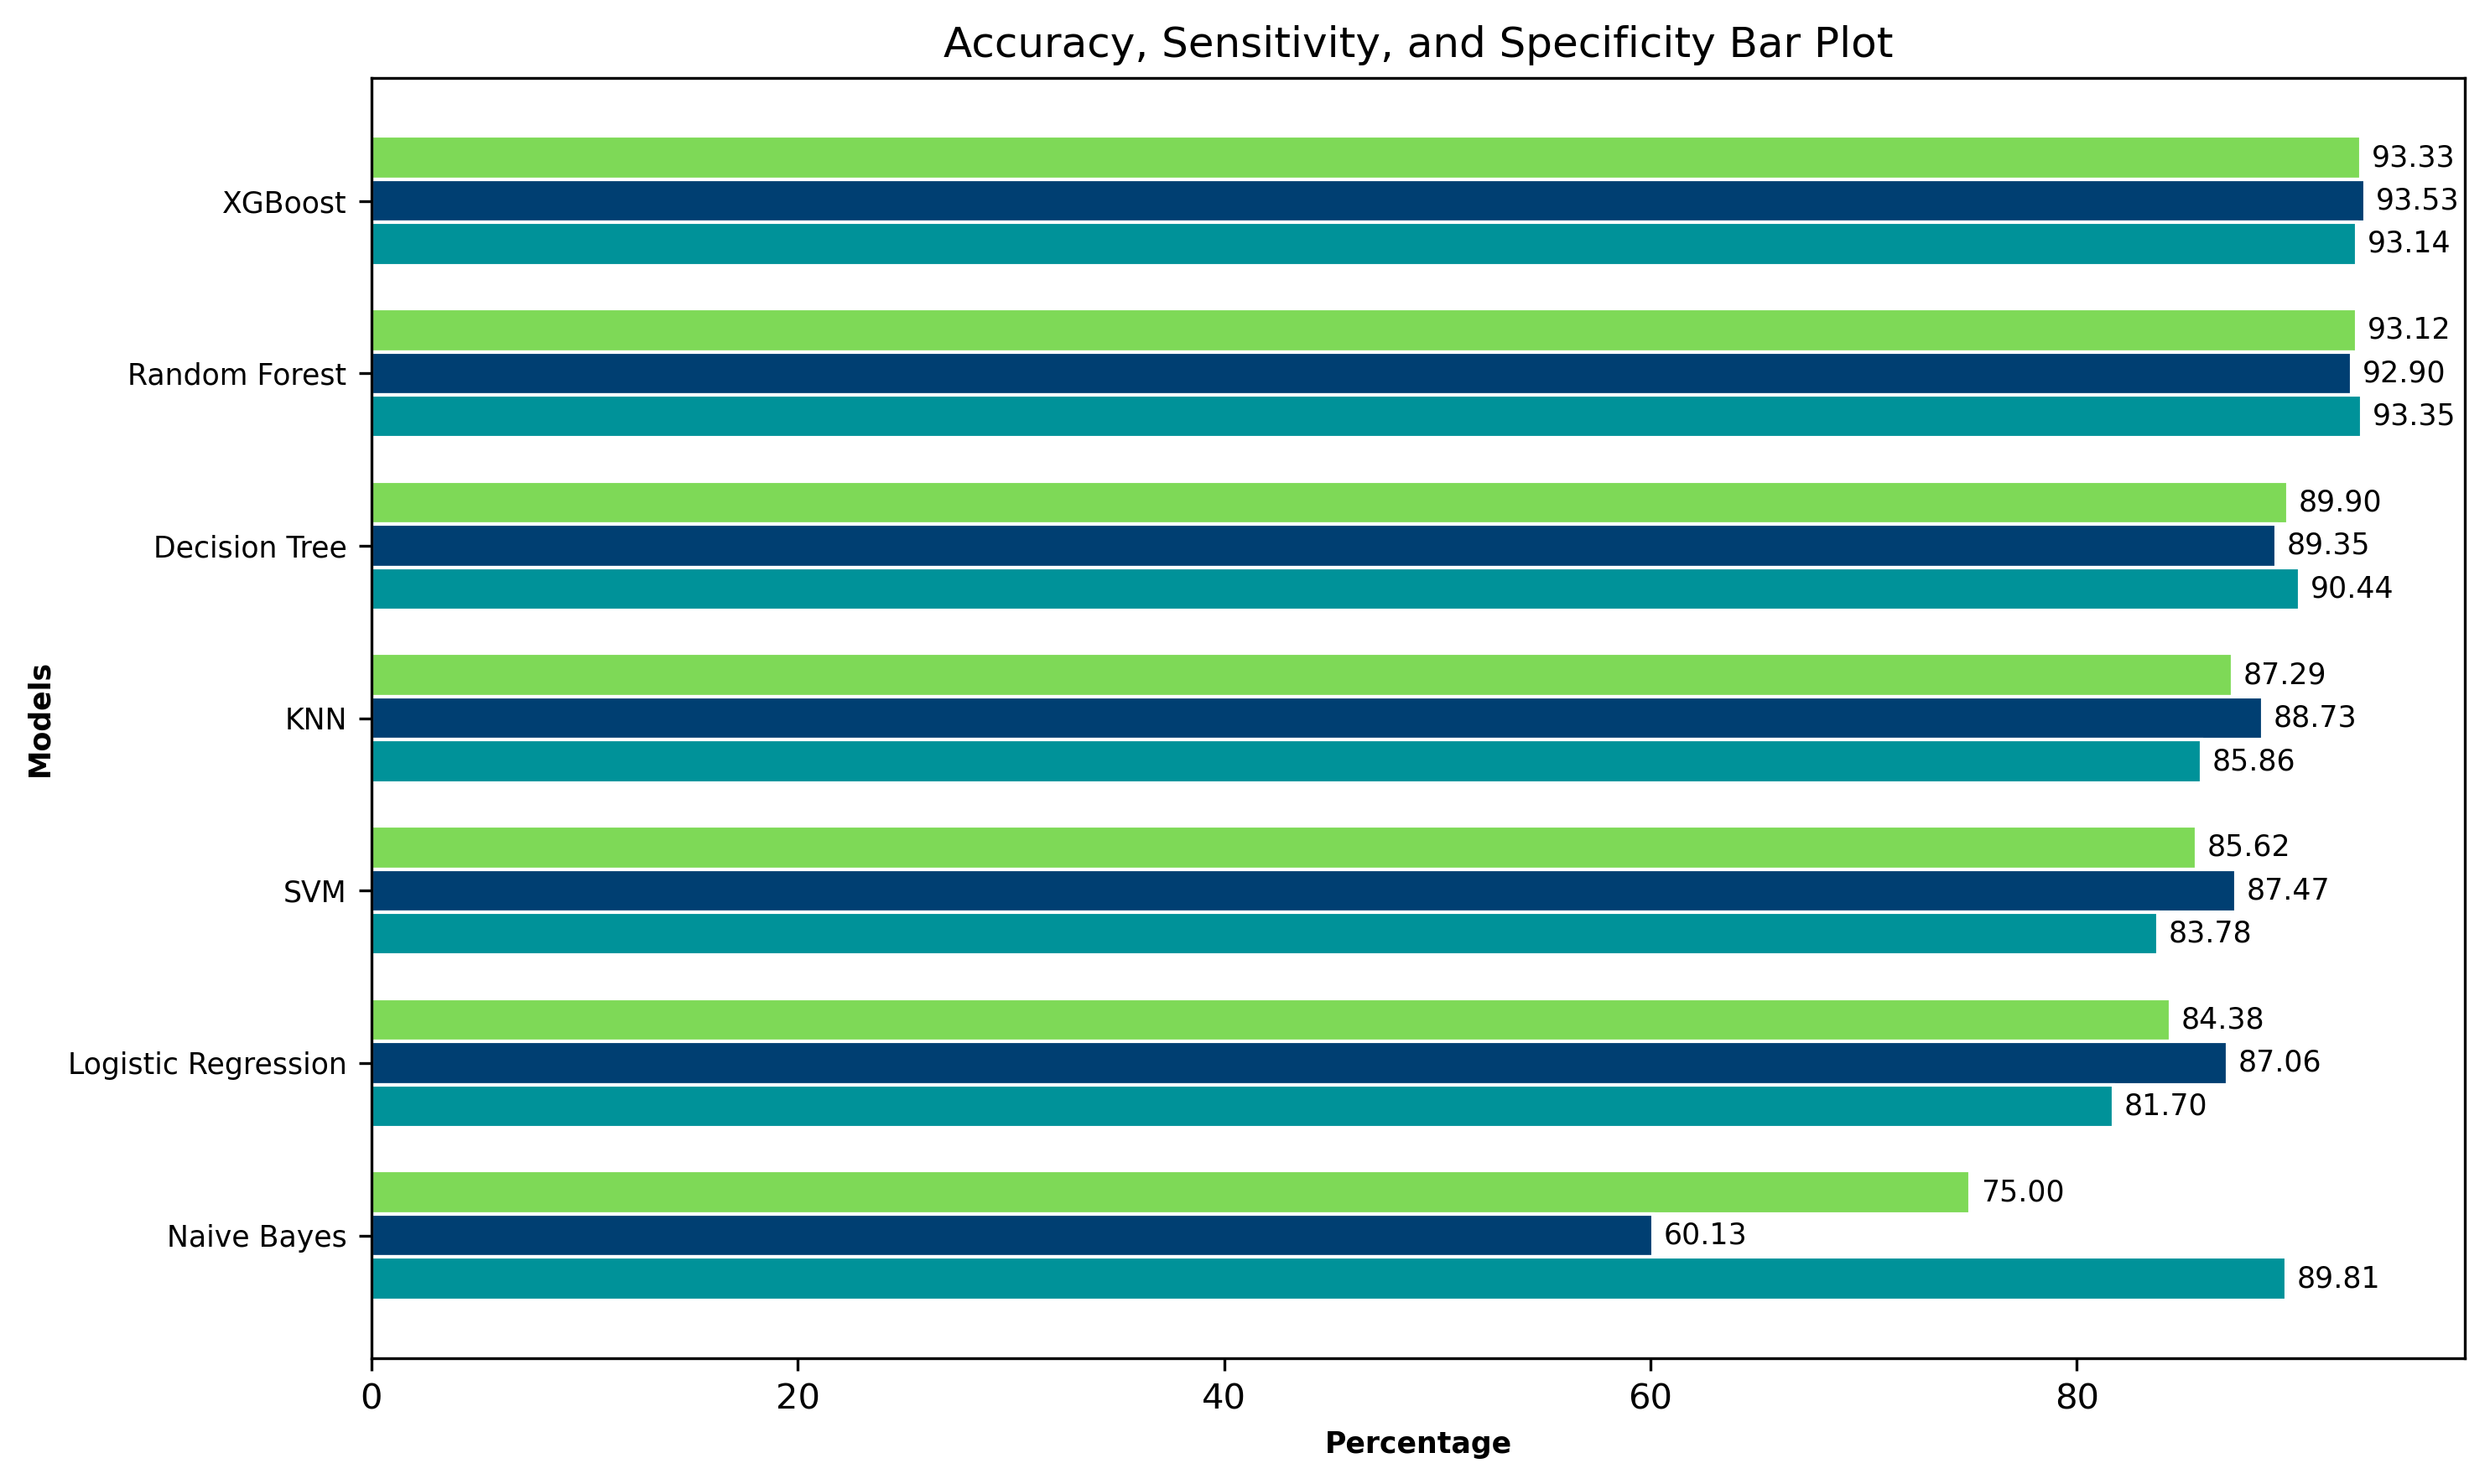

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Naive Bayes", "SVM", "KNN", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

# Performance metrics
accuracy_values = [75.00, 85.62, 87.29, 84.38, 89.90, 93.12, 93.33]
sensitivity_values = [60.13, 87.47, 88.73, 87.06, 89.35, 92.90, 93.53]
specificity_values = [89.81, 83.78, 85.86, 81.70, 90.44, 93.35, 93.14]

# Sort models based on accuracy
sorted_indices = sorted(range(len(accuracy_values)), key=lambda k: accuracy_values[k])
models_sorted = [models[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]
sensitivity_values_sorted = [sensitivity_values[i] for i in sorted_indices]
specificity_values_sorted = [specificity_values[i] for i in sorted_indices]

# Bar height
bar_height = 0.25

# Set position of bar on Y axis
r3 = range(len(models))
r2 = [y + bar_height for y in r3]
r1 = [y + bar_height*2 for y in r3]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=300)
bars1 = plt.barh(r1, accuracy_values_sorted, color='#7ed957', height=bar_height, edgecolor='white', label='Accuracy')
bars2 = plt.barh(r2, sensitivity_values_sorted, color='#003f72', height=bar_height, edgecolor='white', label='Sensitivity')
bars3 = plt.barh(r3, specificity_values_sorted, color='#009299', height=bar_height, edgecolor='white', label='Specificity')

# Adding labels with smaller font size
plt.yticks([r + bar_height for r in range(len(models))], models_sorted, fontsize='smaller')
plt.xlabel('Percentage', fontweight='bold', fontsize='smaller')
plt.ylabel('Models', fontweight='bold', fontsize='smaller')
plt.title('Accuracy, Sensitivity, and Specificity Bar Plot')

# Function to add values beside bars
def add_values(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width+0.5, bar.get_y() + bar.get_height()/2, '{:.2f}'.format(width), va='center', ha='left', fontsize='smaller')

# Add values beside bars
add_values(bars1)
add_values(bars2)
add_values(bars3)
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# Show plot
plt.tight_layout()
plt.show()


### **Precision, NPV and AUC-ROC**

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Logistic Regression", "SVM", "Naive Bayes", "KNN", "Decision Tree", "Random Forest", "XGBoost"]

# Precision values
precision_values = [82.57, 84.31, 85.46, 86.21, 89.89, 93.11, 93.14]

# NPV values
npv_values = [86.37, 87.04, 69.34, 88.44, 89.28, 93.14, 93.53]

# AUC-ROC values
auc_roc_values = [91.95, 90.49, 88.55, 93.07, 89.58, 98.06, 98.17]

# Sort models based on precision
sorted_indices = sorted(range(len(precision_values)), key=lambda k: precision_values[k])
models_sorted = [models[i] for i in sorted_indices]
precision_values_sorted = [precision_values[i] for i in sorted_indices]
npv_values_sorted = [npv_values[i] for i in sorted_indices]
auc_roc_values_sorted = [auc_roc_values[i] for i in sorted_indices]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(r1, precision_values_sorted, color='#6cd600', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, npv_values_sorted, color='#6ce5e8', width=bar_width, edgecolor='grey', label='NPV')
plt.bar(r3, auc_roc_values_sorted, color='#ffcf70', width=bar_width, edgecolor='grey', label='AUC-ROC')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models_sorted, rotation=45)
plt.ylabel('Percentage')
plt.title('Precision, NPV, and AUC-ROC Bar Plot')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.tight_layout()
plt.show()


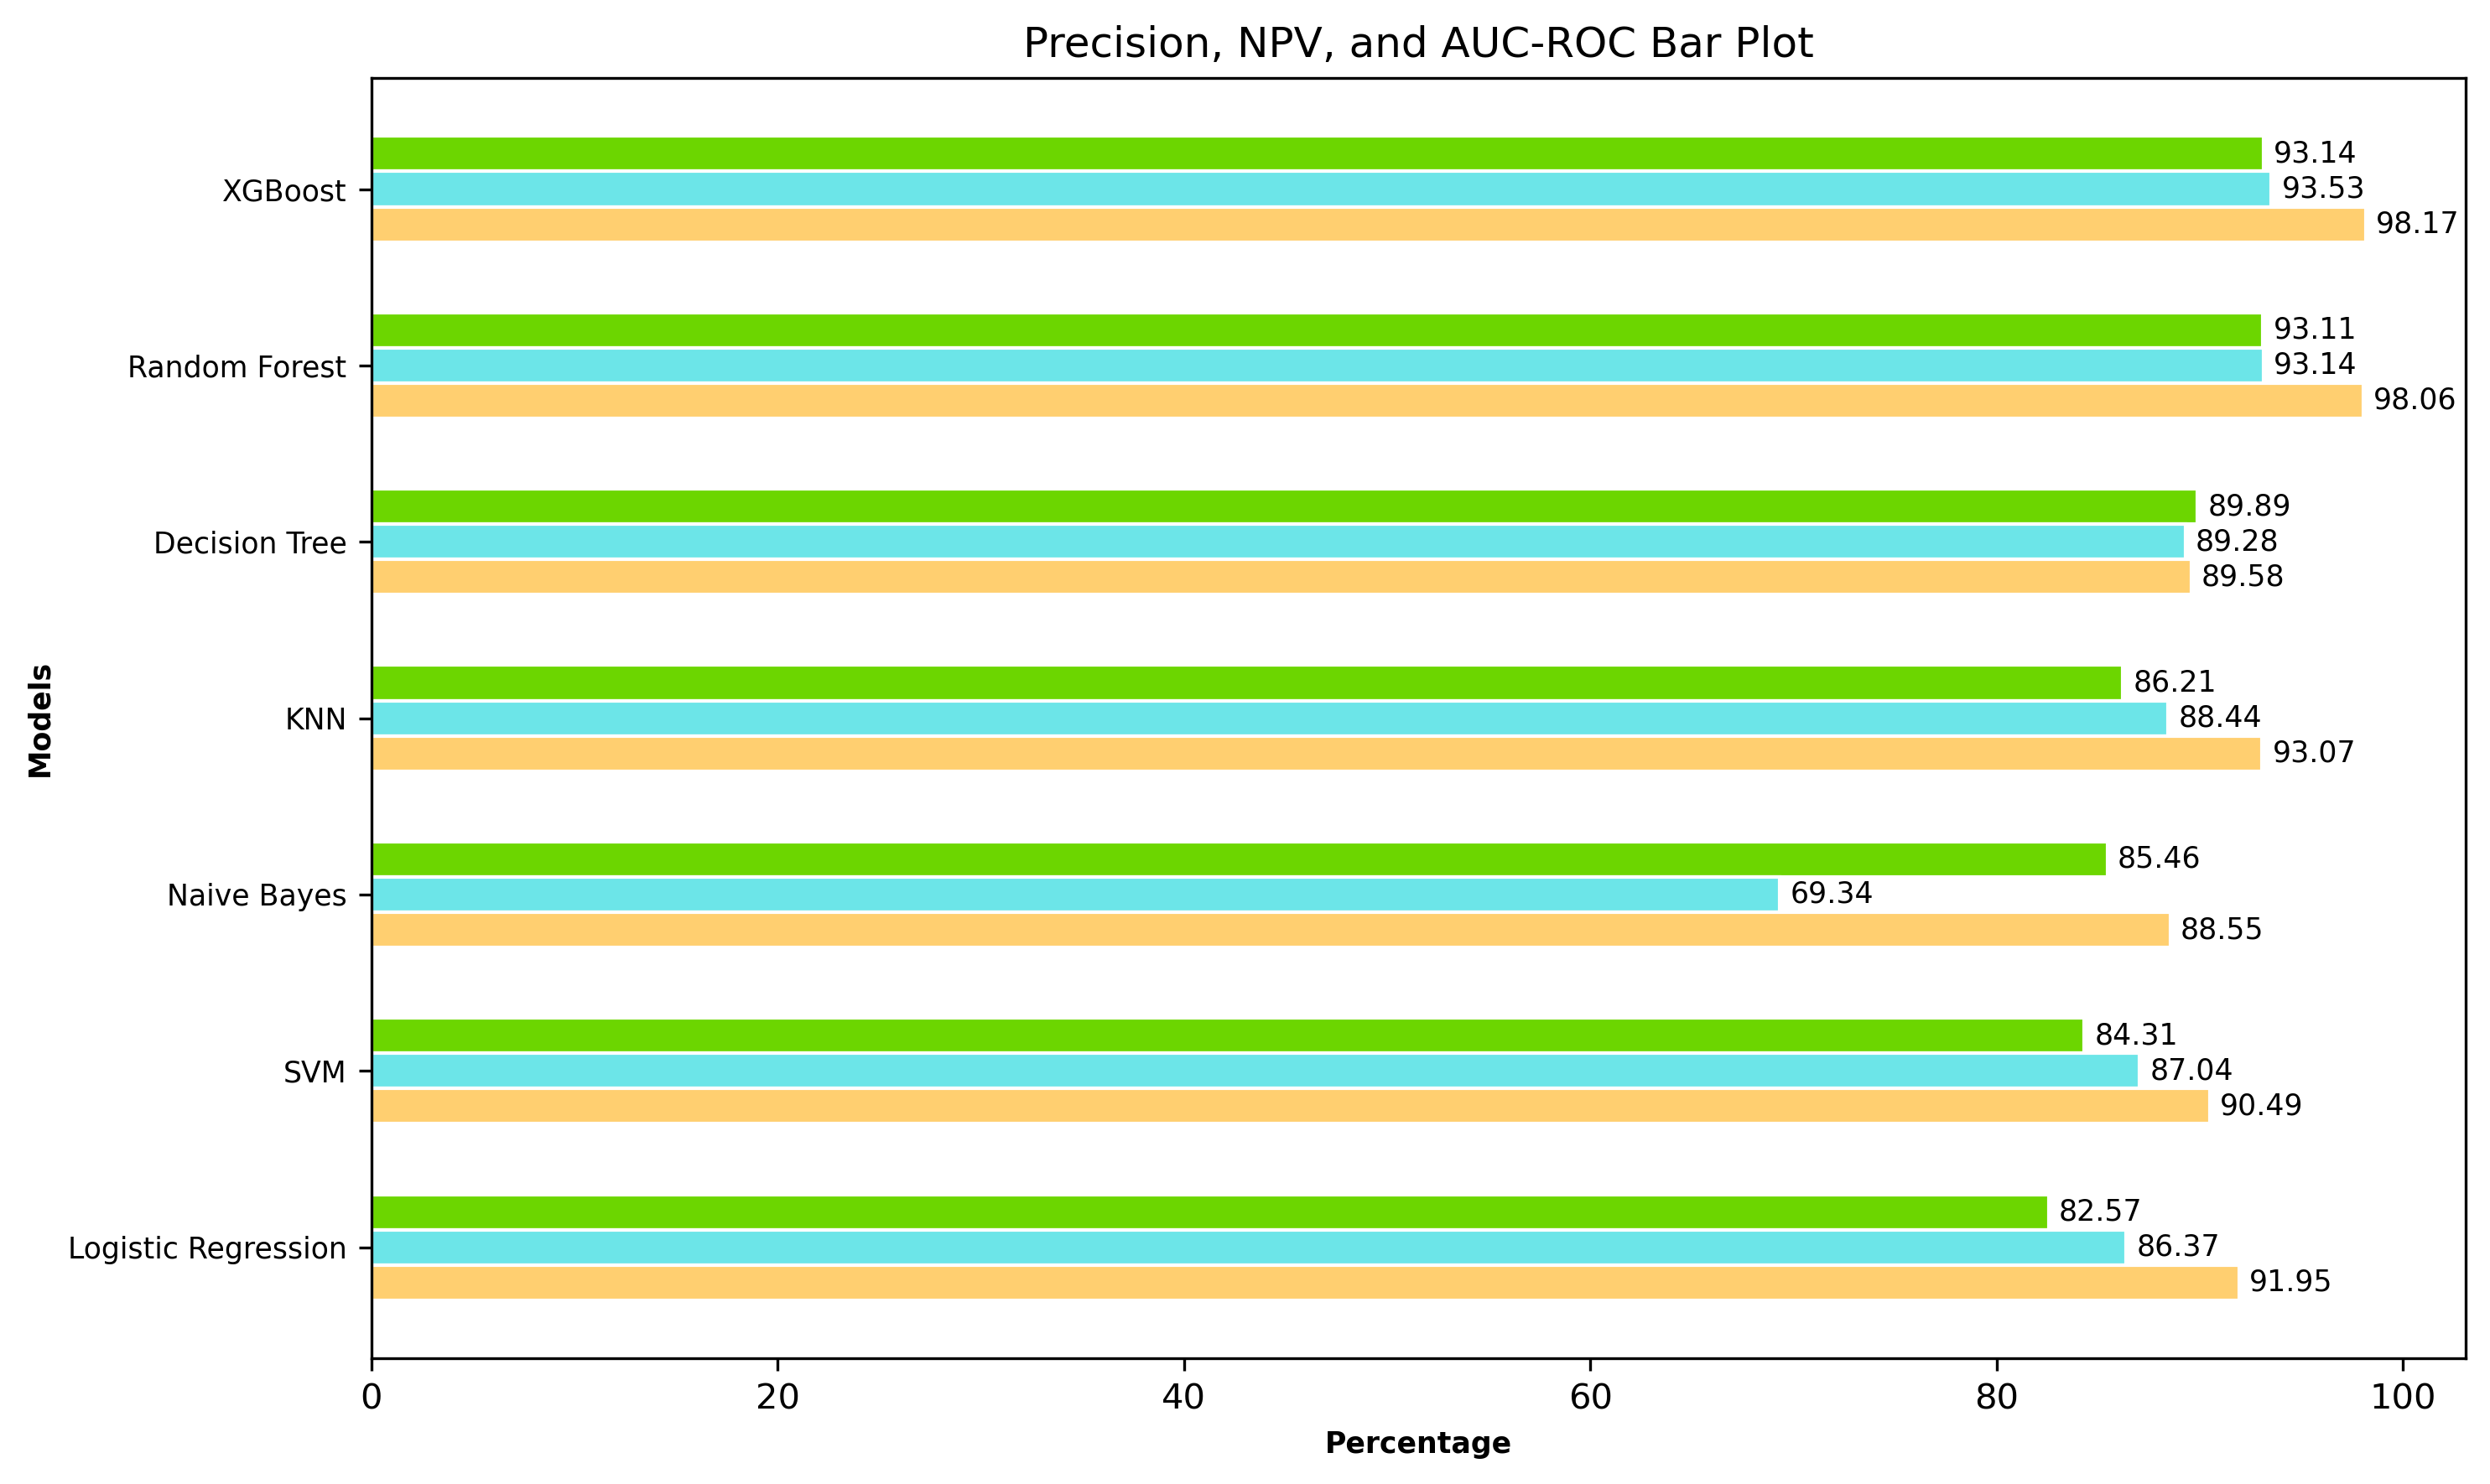

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Logistic Regression", "SVM", "Naive Bayes", "KNN", "Decision Tree", "Random Forest", "XGBoost"]

# Precision values
precision_values = [82.57, 84.31, 85.46, 86.21, 89.89, 93.11, 93.14]

# NPV values
npv_values = [86.37, 87.04, 69.34, 88.44, 89.28, 93.14, 93.53]

# AUC-ROC values
auc_roc_values = [91.95, 90.49, 88.55, 93.07, 89.58, 98.06, 98.17]

# Sort models based on precision
sorted_indices = sorted(range(len(precision_values)), key=lambda k: precision_values[k])
models_sorted = [models[i] for i in sorted_indices]
precision_values_sorted = [precision_values[i] for i in sorted_indices]
npv_values_sorted = [npv_values[i] for i in sorted_indices]
auc_roc_values_sorted = [auc_roc_values[i] for i in sorted_indices]

# Bar height
bar_height = 0.2

# Set position of bar on Y axis
r3 = range(len(models))
r2 = [y + bar_height for y in r3]
r1 = [y + bar_height*2 for y in r3]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=300)
bars1 = plt.barh(r1, precision_values_sorted, color='#6cd600', height=bar_height, edgecolor='white', label='Precision')
bars2 = plt.barh(r2, npv_values_sorted, color='#6ce5e8', height=bar_height, edgecolor='white', label='NPV')
bars3 = plt.barh(r3, auc_roc_values_sorted, color='#ffcf70', height=bar_height, edgecolor='white', label='AUC-ROC')

# Adding labels with smaller font size
plt.yticks([r + bar_height for r in range(len(models))], models_sorted, fontsize='smaller')
plt.xlabel('Percentage', fontweight='bold', fontsize='smaller')
plt.ylabel('Models', fontweight='bold', fontsize='smaller')
plt.title('Precision, NPV, and AUC-ROC Bar Plot')

# Function to add values beside bars
def add_values(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width+0.5, bar.get_y() + bar.get_height()/2, '{:.2f}'.format(width), va='center', ha='left', fontsize='smaller')

# Add values beside bars
add_values(bars1)
add_values(bars2)
add_values(bars3)

# Show legend
#plt.legend(loc='lower right', fontsize='smaller')

# Show plot
plt.tight_layout()
plt.show()
